<a href="https://colab.research.google.com/gist/gowatana/1fc66e48db015732e3a88870af2ac67b/demo-tensorflow-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考：初心者のための TensorFlow 2.0 入門
* https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja

パイプラインのデモむけに、あえて4分割してある。


# 1. モデルの作成（コード分割）

TensorFlowのインポート

In [3]:
import tensorflow as tf

TensorFlowのバージョン確認

In [2]:
print(tf.__version__)

2.5.3


# 1. 画像判別モデルの作成

## 1-1. データセットの保存

サンプル データセット（MNIST）をダウンロードして保存する。

In [8]:
# 1. データセットの保存
import tensorflow as tf
import numpy as np
import os

# データセットをダウンロードして保存するディレクトリを指定
save_dir = './dataset'

# ディレクトリが存在しない場合にディレクトリを作成
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# MNISTデータセットをダウンロード（初回のみ）
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# データセットを指定したディレクトリに保存
np.savez_compressed(os.path.join(save_dir, 'mnist.npz'), x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

## 1-2. データセットをロードして前処理

In [12]:
# 2. データセットをロードして前処理
import tensorflow as tf
import numpy as np
import os

# データセットをダウンロードして保存するディレクトリを指定
load_dir = './dataset'
save_dir = './preproc_dataset'

# ディレクトリが存在しない場合にディレクトリを作成
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
with np.load(os.path.join(load_dir, 'mnist.npz'), allow_pickle=True) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

x_train, x_test = x_train / 255.0, x_test / 255.0
np.savez_compressed(os.path.join(save_dir, 'mnist_normalized.npz'), x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

## 1-3. 前処理済みのデータセットで学習 → モデルを保存

In [4]:
# 3. 正規化されたデータセットをロードして学習
# データセットをダウンロードして保存するディレクトリを指定
import tensorflow as tf
import numpy as np
import os

load_dir = './preproc_dataset'
save_dir = './saved_model'

# ディレクトリが存在しない場合にディレクトリを作成
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

with np.load(os.path.join(load_dir, 'mnist_normalized.npz'), allow_pickle=True) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

model.save(save_dir)

2024-02-19 09:00:21.578795: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2950 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1426 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1059 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0853 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0748 - accuracy: 0.9767


2024-02-19 09:02:15.367874: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./saved_model/assets


## 1-4. モデルのテスト

In [1]:
# 4. モデルをロードしてテスト
import tensorflow as tf
import numpy as np
import os

data_load_dir = './preproc_dataset'
model_load_dir = './saved_model'

with np.load(os.path.join(data_load_dir, 'mnist_normalized.npz'), allow_pickle=True) as data:
    x_test = data['x_test']
    y_test = data['y_test']

model = tf.keras.models.load_model(model_load_dir)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.evaluate(x_test, y_test, verbose=2)

2024-02-19 09:05:26.003948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-19 09:05:26.004014: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-19 09:05:29.914114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-19 09:05:29.914182: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-19 09:05:29.914239: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (note-03-0): /proc/driver/nvidia/version does not exist
2024-02-19 09:05:29.914588: I tensorflow/core/platform/cpu_feature_

313/313 - 3s - loss: 0.0706 - accuracy: 0.9774


[0.07055041939020157, 0.977400004863739]

# 2. 推論実行（画像の数値を判別）

トレーニングで利用したデータなので、まず正解するはず。

## 2-1. MNISTのデータを画像ファイル（PNG）としての保存

In [10]:
from PIL import Image
import tensorflow as tf
import os

dir_path = 'data/images'

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保存先のディレクトリを作成
os.makedirs(dir_path, exist_ok=True)

# 画像の保存
for i in range(10):
    img = Image.fromarray(x_train[i])
    img.save(f'data/images/test_{i}.png')

In [11]:
!ls data/images/ | head

test_0.png
test_1.png
test_2.png
test_3.png
test_4.png
test_5.png
test_6.png
test_7.png
test_8.png
test_9.png


画像の表示

ファイルを指定する。（例： train_1.png）

In [12]:
img_file_name = 'data/images/test_7.png'

指定した画像を表示して確認。

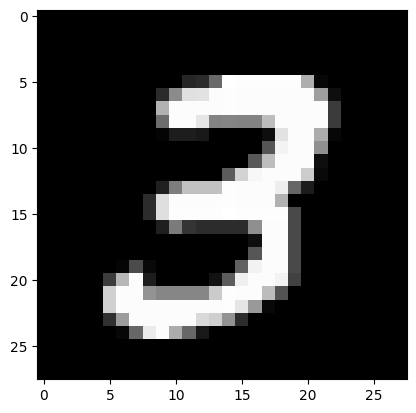

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(img_file_name)
plt.imshow(img, cmap='gray')  # 画像がグレースケールなので cmap='gray' を指定
plt.show()

## 2-2. 推論の実行

事前に、img_file_name = 'data/images/test_7.png' を指定してあるはず。

PIL（Python Image Library）のパッケージはPillow

In [17]:
from PIL import Image
import numpy as np
import tensorflow as tf

# モデルを保存してあるパス
model_dir_path = './saved_model'

# 画像の読み込み
img = Image.open(img_file_name)

# 画像をグレースケールに変換し、サイズを28x28にリサイズ
img = img.convert('L').resize((28, 28))

# NumPy配列に変換し、値を0から1の範囲に正規化
img_array = np.array(img) / 255.0

# モデルの入力形式に合わせるために配列の形状を変更（バッチサイズの次元を追加）
img_array = img_array.reshape(1, 28, 28)

# モデルのロード
model = tf.keras.models.load_model(model_dir_path)  # モデルのパスを適切に設定

# 推論
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)

Predicted class: [3]


補足： PIL（Pillow）のパッケージ確認。

In [18]:
!pip list | grep -i pillow

Pillow                   9.2.0
